The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
1116044.7981805634
https://earthengine.googleapis.com/api/download?docid=119a454b5e8cd575f8d44692adaba0cf&token=6bf4149ec38f64672b94f179b9bac771


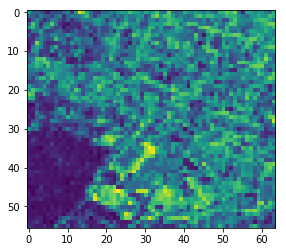

In [56]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import pprint
pp = pprint.PrettyPrinter(indent=4)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import ee

# import my custom library of helper functions
from gee_library import *

ee.Initialize()

monterey = (-121.9, 36.6)

california_bounds = bound_geometry(
                        (-121.931910, 36.618839),
                        (-121.920505, 36.608979)
                    )


maps_collection = ee.ImageCollection('USDA/NAIP/DOQQ')

monterey_images = all_images_at_location(maps_collection, monterey)

# geo = monterey_images.first().geometry().getInfo()['coordinates']

# pp.pprint(monterey_images.first().geometry().area().getInfo())

# [[[x1, y1],
#  [x2, y2],
#  [x3, y3],
#  [x4, y4],
#  [x5, y5]]] = geo

# xs = [x1,x2,x3,x4,x5]
# ys = [y1,y2,y3,y4,y5]
# ul = [min(xs), max(ys)]
# br = [max(xs), min(ys)]

# california_bounds = bound_geometry(ul, br)

# print california_bounds.convexHull().area().getInfo()

pp.pprint(california_bounds.convexHull().area().getInfo())

for z in [20]:
    
    tiles =  element_to_img(monterey_images.first(), z, ['R'], california_bounds)

    for t in tiles:
        img=mpimg.imread(t)
        plt.imshow(img)
        plt.show()




    

In [248]:
import requests, time
import StringIO


filtered_collection = maps_collection.filterBounds(california_bounds).select('R')
gee_img = filtered_collection.mosaic()

# img_list = monterey_images.select('R').toList(10)
# print img_list.size().getInfo(), "found."
# pylist = [img_list.get(i) for i in range(7)]
# gee_img = ee.ImageCollection(pylist).mosaic()

# gee_img = ee.Image(monterey_images.select('R').first())

scale = 5
# img_area = gee_img.geometry().area().getInfo()
# print img_area
# print math.sqrt(img_area)/scale

path=gee_img.getDownloadURL({
        'name': "imamap",  # name the file (otherwise it will be a uninterpretable hash)
        'scale': scale,                              # resolution in meters
#         'crs': 'EPSG:4326', #4326                         #  projection
#         'bands': [{'id': 'R'}]
        'region': str(california_bounds.getInfo()['coordinates'])
        });

print path

r = requests.get(path)
print(r.status_code)


z = zipfile.ZipFile(StringIO.StringIO(r.content))
z.extractall('./tmp')
    

        

# # convert to tiff
# tif_location = unzipURL(path)

# img=mpimg.imread(os.path.join(tif_location, 'imamap.R.tif'))
# plt.imshow(img)
# plt.show()

https://earthengine.googleapis.com/api/download?docid=f676bf4582169ad8e2a78d1ffb3f8db6&token=a8a65b16b2f69bf54a7ce0f1142455ef
200


200


In [175]:
import math
# img_at_region(maps_collection, 900, 'R', california_bounds)

# print dir(ee.Filter)
# spacial_filter = ee.Filter.filterBounds(california_bounds)

filtered_collection = maps_collection.filterBounds(california_bounds)
print collection_length(filtered_collection), "images available."

gee_img = maps_collection.mosaic()
gee_img2 = ee.Image(monterey_images.first())

pp.pprint(gee_img2.getInfo())
pp.pprint(gee_img.getInfo())


7 images available.
{   u'bands': [   {   u'crs': u'EPSG:26910',
                      u'crs_transform': [   1.0,
                                            0.0,
                                            594700.0,
                                            0.0,
                                            -1.0,
                                            4054180.0],
                      u'data_type': {   u'max': 255,
                                        u'min': 0,
                                        u'precision': u'int',
                                        u'type': u'PixelType'},
                      u'dimensions': [6290, 7620],
                      u'id': u'R'},
                  {   u'crs': u'EPSG:26910',
                      u'crs_transform': [   1.0,
                                            0.0,
                                            594700.0,
                                            0.0,
                                            -1.0,
               